<h1>Nivell 1</h1>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kde

<h2>Exercici 1</h2>

**Graphically summarize the dateset and Create at least one view for:**

In [4]:
df = pd.read_csv("/Volumes/GoogleDrive/Mi unidad/Barcelona Activa/Itinerario Data Science/S04/Airline_Delay/DelayedFlights.csv",index_col=0)

In [5]:
filled_df= df.dropna()
filled_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,...,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0
11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,1333,...,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0
16,2008,1,3,4,1452.0,1425,1640.0,1625,WN,675,...,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0
18,2008,1,3,4,1323.0,1255,1526.0,1510,WN,4,...,4.0,9.0,0,N,0,0.0,0.0,0.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009705,2008,12,13,6,921.0,830,1112.0,1008,DL,1616,...,8.0,21.0,0,N,0,51.0,0.0,13.0,0.0,0.0
7009709,2008,12,13,6,1552.0,1520,1735.0,1718,DL,1620,...,9.0,7.0,0,N,0,0.0,0.0,0.0,0.0,17.0
7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0


<h3>A categorical variable (UniqueCarrier)</h3>

In [6]:
#Plot the categorical variable (Carrier) vs the AirTime, separate the columns in a subset

carrier = filled_df[["UniqueCarrier","AirTime"]]
df_carrier = pd.DataFrame(carrier)


In [7]:
#Group by the carrier and calculate the mean

flight_carrier = df_carrier.groupby(by="UniqueCarrier").mean()
flight_carrier

,AirTime
UniqueCarrier,
9E,73.472944
AA,144.962429
AQ,99.897059
AS,127.710062
B6,148.555529
CO,162.164151
DL,129.953538
EV,72.703598
F9,125.521267


In [8]:
#Get the carriers and create a DataFrame
n_carrier = carrier["UniqueCarrier"].unique()
df_n_carrier = pd.DataFrame(n_carrier)

#Reset the index because will complicate the process

df_n_carrier.reset_index(drop=True,inplace=True)
flight_carrier.reset_index(drop=True,inplace=True)

#Concatenate the DF and rename the columns

new_df = pd.concat([df_n_carrier,flight_carrier],ignore_index = True,axis=1)
df_new = new_df.rename(columns ={0:"Carrier",1:"AirTime"})
df_new

,Carrier,AirTime
0,WN,73.472944
1,XE,144.962429
2,YV,99.897059
3,OH,127.710062
4,OO,148.555529
5,UA,162.164151
6,US,129.953538
7,DL,72.703598
8,EV,125.521267
9,F9,105.445234


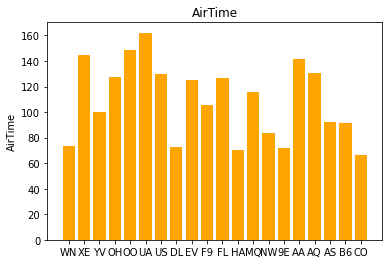

<Figure size 432x288 with 0 Axes>

In [9]:
#convert the DF to an array and create the lineplot

arr_carrier = df_new["Carrier"].to_numpy()
arr_air_time = df_new["AirTime"].to_numpy()

x = arr_carrier
y = arr_air_time



fig_mat_one= plt.bar(x,y,color="orange")

plt.title("AirTime")
plt.xticks(x,arr_carrier)
plt.ylabel("AirTime")
plt.show()
plt.savefig("fig_mat_one.jpg",dpi=150)


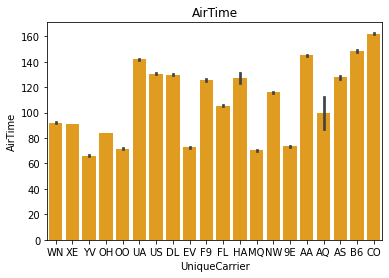

In [10]:
# with seaborn is simple to graph the barplot 

fig_one = sns.barplot(x="UniqueCarrier",y="AirTime",data =filled_df,color="orange")
fig_one.set_title("AirTime")
fig_sns_one = fig_one.figure

<h3> A numeric variable (ArrDelay) </h3>

<Figure size 1080x1440 with 0 Axes>

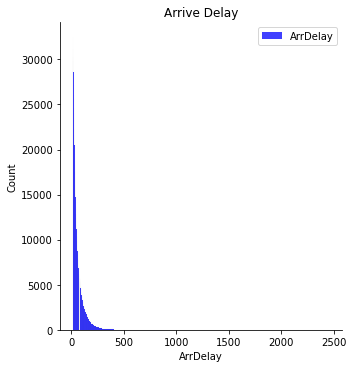

In [11]:
# the numeric value can be displayed with the displot

plt.figure(figsize=(15,20))
fig_two =  sns.displot(data = filled_df["ArrDelay"], color="blue").set(title="Arrive Delay")
plt.legend(labels=["ArrDelay"])
fig_sns_two = fig_two.figure

<h3> A numeric and categorical variable(ArrDelay and UniqueCarrier) </h3>

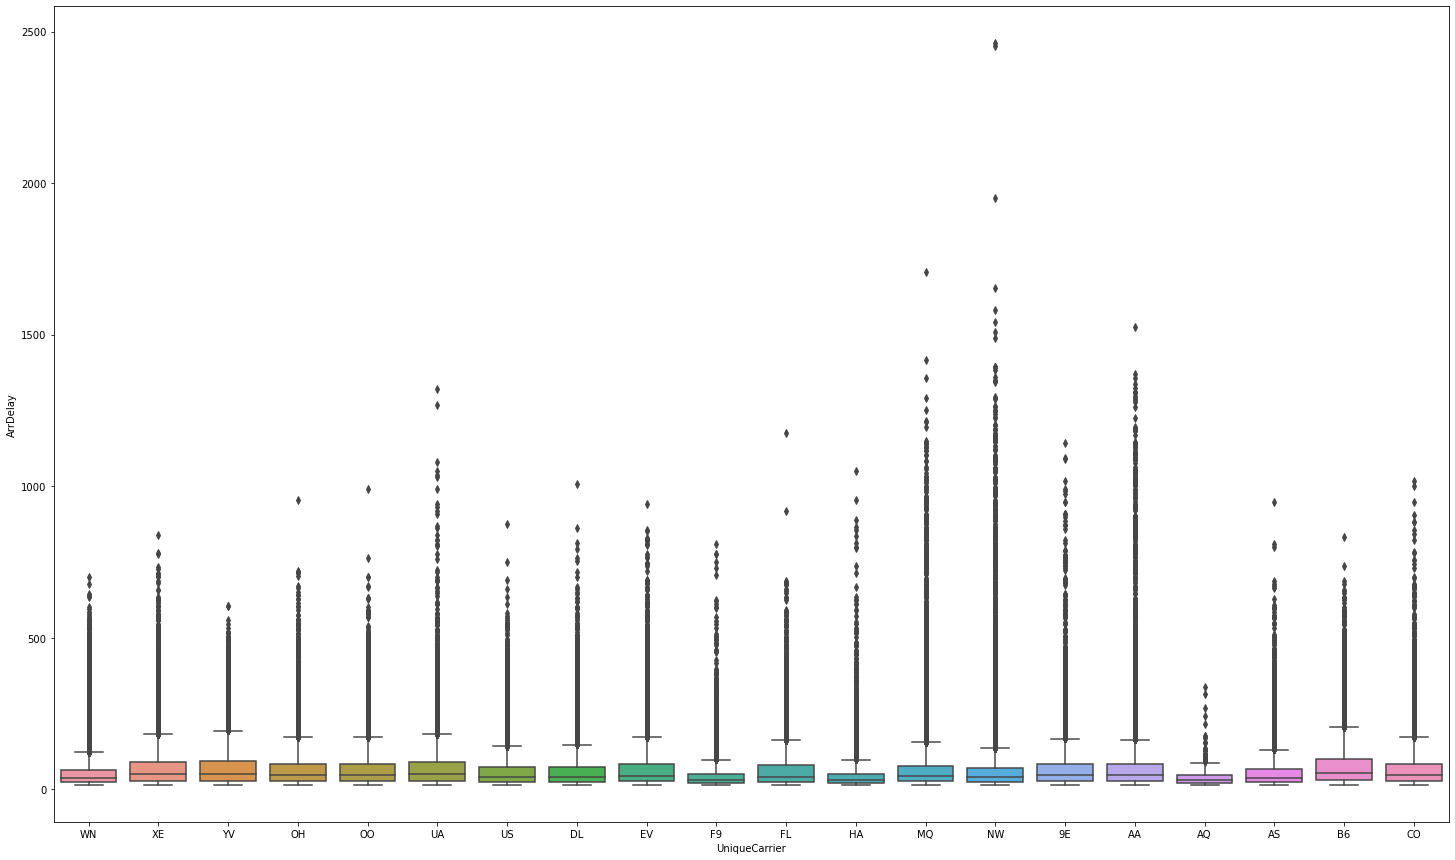

In [12]:
#the command figsize is to adjust the graph size for a better view

plt.figure(figsize=(25,15))
fig_three = sns.boxplot(x= "UniqueCarrier",y= "ArrDelay",data=filled_df)
fig_sns_three = fig_three.figure

<h3> two numeric variables (ArrDelay and DepDelay) </h3>

In [13]:
df_numeric_values = filled_df[["ArrDelay","DepDelay"]]
df_numeric_values

,ArrDelay,DepDelay
4,34.0,34.0
6,57.0,67.0
11,80.0,94.0
16,15.0,27.0
18,16.0,28.0
...,...,...
7009705,64.0,51.0
7009709,17.0,32.0
7009710,25.0,30.0
7009717,75.0,57.0


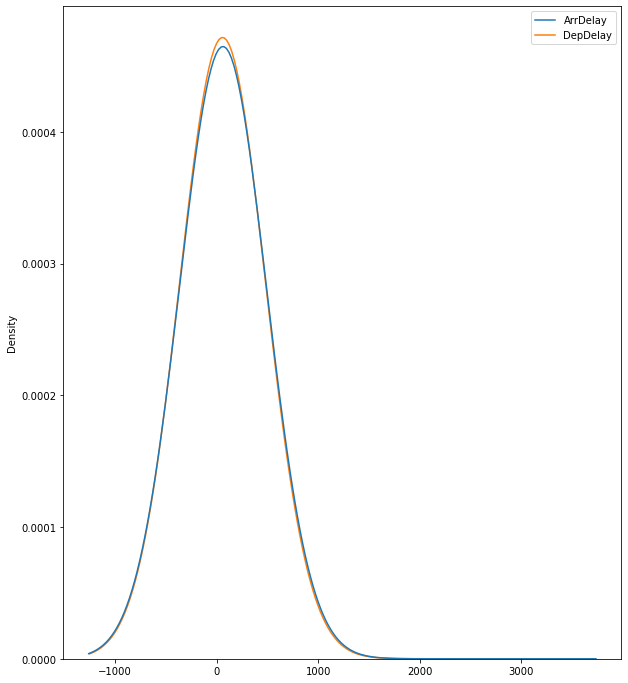

In [14]:
plt.figure(figsize=(10,12))
fig_four = sns.kdeplot(data = df_numeric_values,bw_method=7)
fig_sns_four = fig_four.figure
plt.show()

<h3>Three variables (ArrDelay,DepDelay and UniqueCarrier</h3>

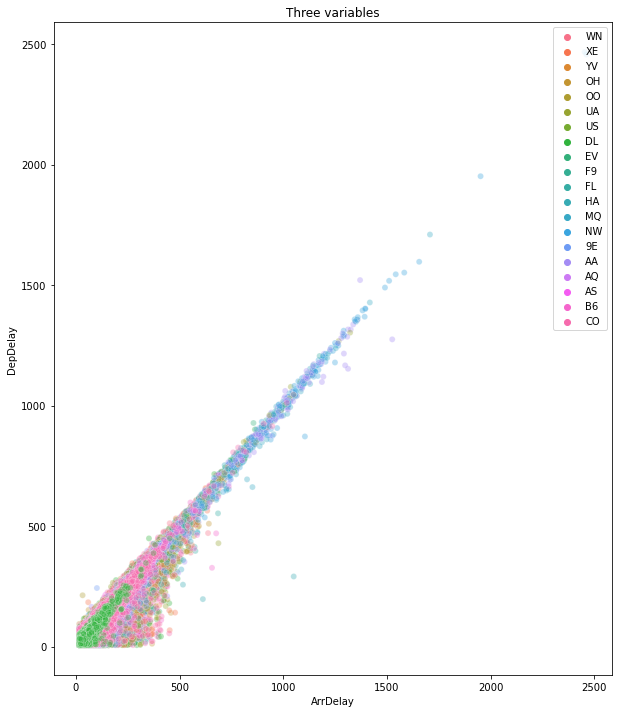

In [15]:
plt.figure(figsize=(10,12))

fig_five = sns.scatterplot(hue="UniqueCarrier",x = "ArrDelay",y ="DepDelay",data = filled_df,alpha=.35)

plt.legend(loc="upper right")

plt.title("Three variables")

fig_sns_five = fig_five.figure

<h3>More than three variables (ArrDelay, DepDelay, AirTime and UniqueCarrier)</h3>

In [16]:
df_four_all = filled_df[["UniqueCarrier","ArrDelay","DepDelay","AirTime"]]
df_four_all

,UniqueCarrier,ArrDelay,DepDelay,AirTime
4,WN,34.0,34.0,77.0
6,WN,57.0,67.0,230.0
11,WN,80.0,94.0,107.0
16,WN,15.0,27.0,213.0
18,WN,16.0,28.0,110.0
...,...,...,...,...
7009705,DL,64.0,51.0,82.0
7009709,DL,17.0,32.0,27.0
7009710,DL,25.0,30.0,120.0
7009717,DL,75.0,57.0,78.0


Text(0.5, 1.0, 'More than three variables')

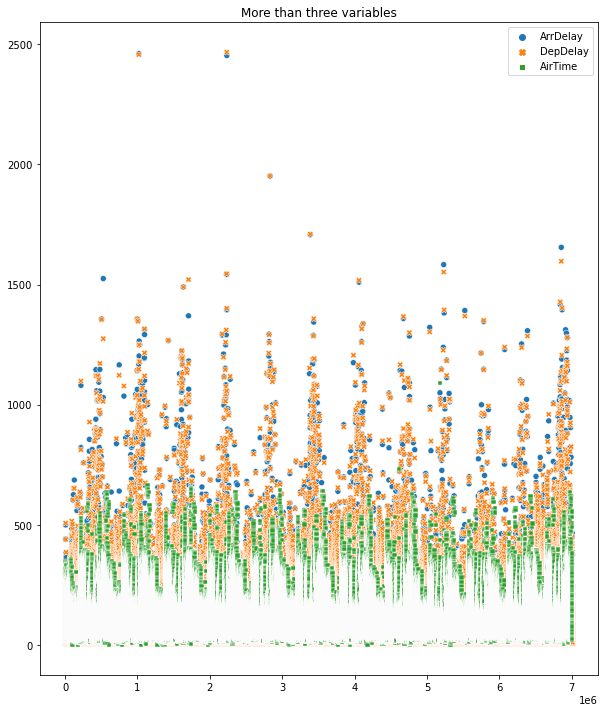

In [17]:
plt.figure(figsize=(10,12))

fig_six = sns.scatterplot(data=df_four_all)

plt.legend(loc="upper right")

plt.title("More than three variables")


<h2>Exercici 2</h2>

In [18]:
fig_sns_one.savefig("1_1_categorical_variable_sns.png")

In [19]:
fig_sns_two.savefig("1_2_numeric_variable_sns.png")

In [20]:
fig_sns_three.savefig("1_3_numeric_categorical_sns.png")

In [21]:
fig_sns_four.savefig("1_4_two_numeric.png")

In [22]:
fig_sns_five.savefig("1_5_three_variables.png")


In [23]:
fig_six.get_figure().savefig("1_6_three_or_more_variables.png")

<h2>Exercici 2</h2>

**The exercise 3 is apply the data visualitzation click the link below.**

<a href="https://github.com/Freegalado/visualitzacio_exploratoria.git">estructures_Dataframe notebook</a>